# Initial visualizations with WordCloud

In [1]:
# Import packages
import pandas as pd
import numpy as np

from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt

In [2]:
# Open the data file
data = pd.read_csv("Consumer_Complaints.csv")

In [3]:
len(data)

139773

In [4]:
# Join all the issues
complaint = " ".join(word for word in data.Issue)

In [5]:
# Generate a word cloud image
wordcloud1 = WordCloud(background_color="white").generate(complaint)

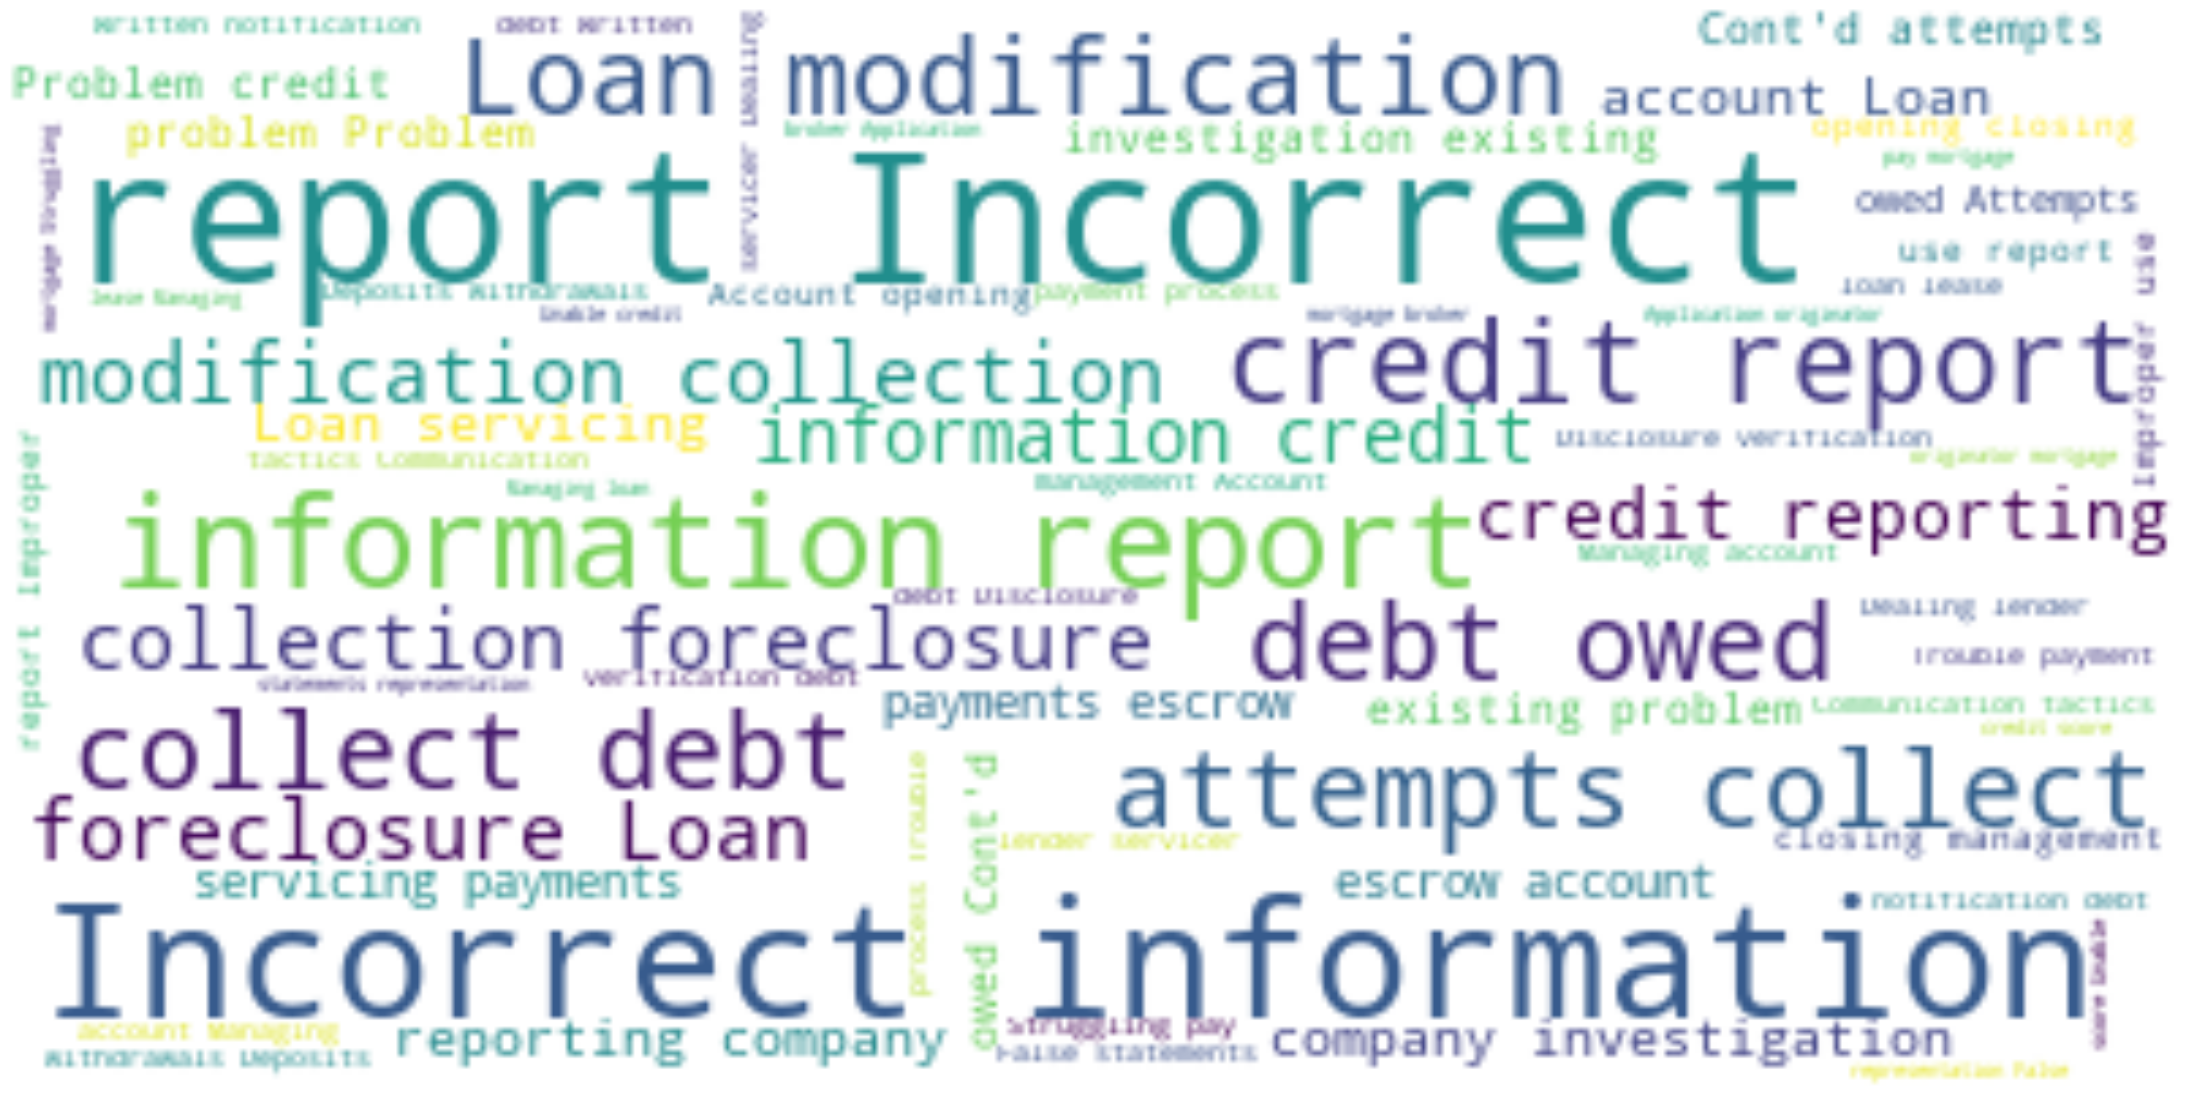

In [6]:
# Display the wordcloud image:
plt.figure(figsize=[40,20])
plt.imshow(wordcloud1, interpolation='bilinear')
plt.axis("off")
plt.show()

Some takeaways:information is one thing people care most about. There're so many related words that were mentioned a lot in customer's complaints, including "information paper", "information credit", "incorrect information", etc. And incorrect information has become one of the most serious issues all across those companies.

In [7]:
# Setting stopwords
stopwords = list(STOPWORDS) + ["report", "information", "problem", "problems", "company", "use", "collect", "collection", "Cont'd", "management", "process", "existing"]

# Generate a word cloud image with words not included in the stopwords list
wordcloud2 = WordCloud(background_color="white", stopwords = stopwords, collocations = False).generate(complaint)

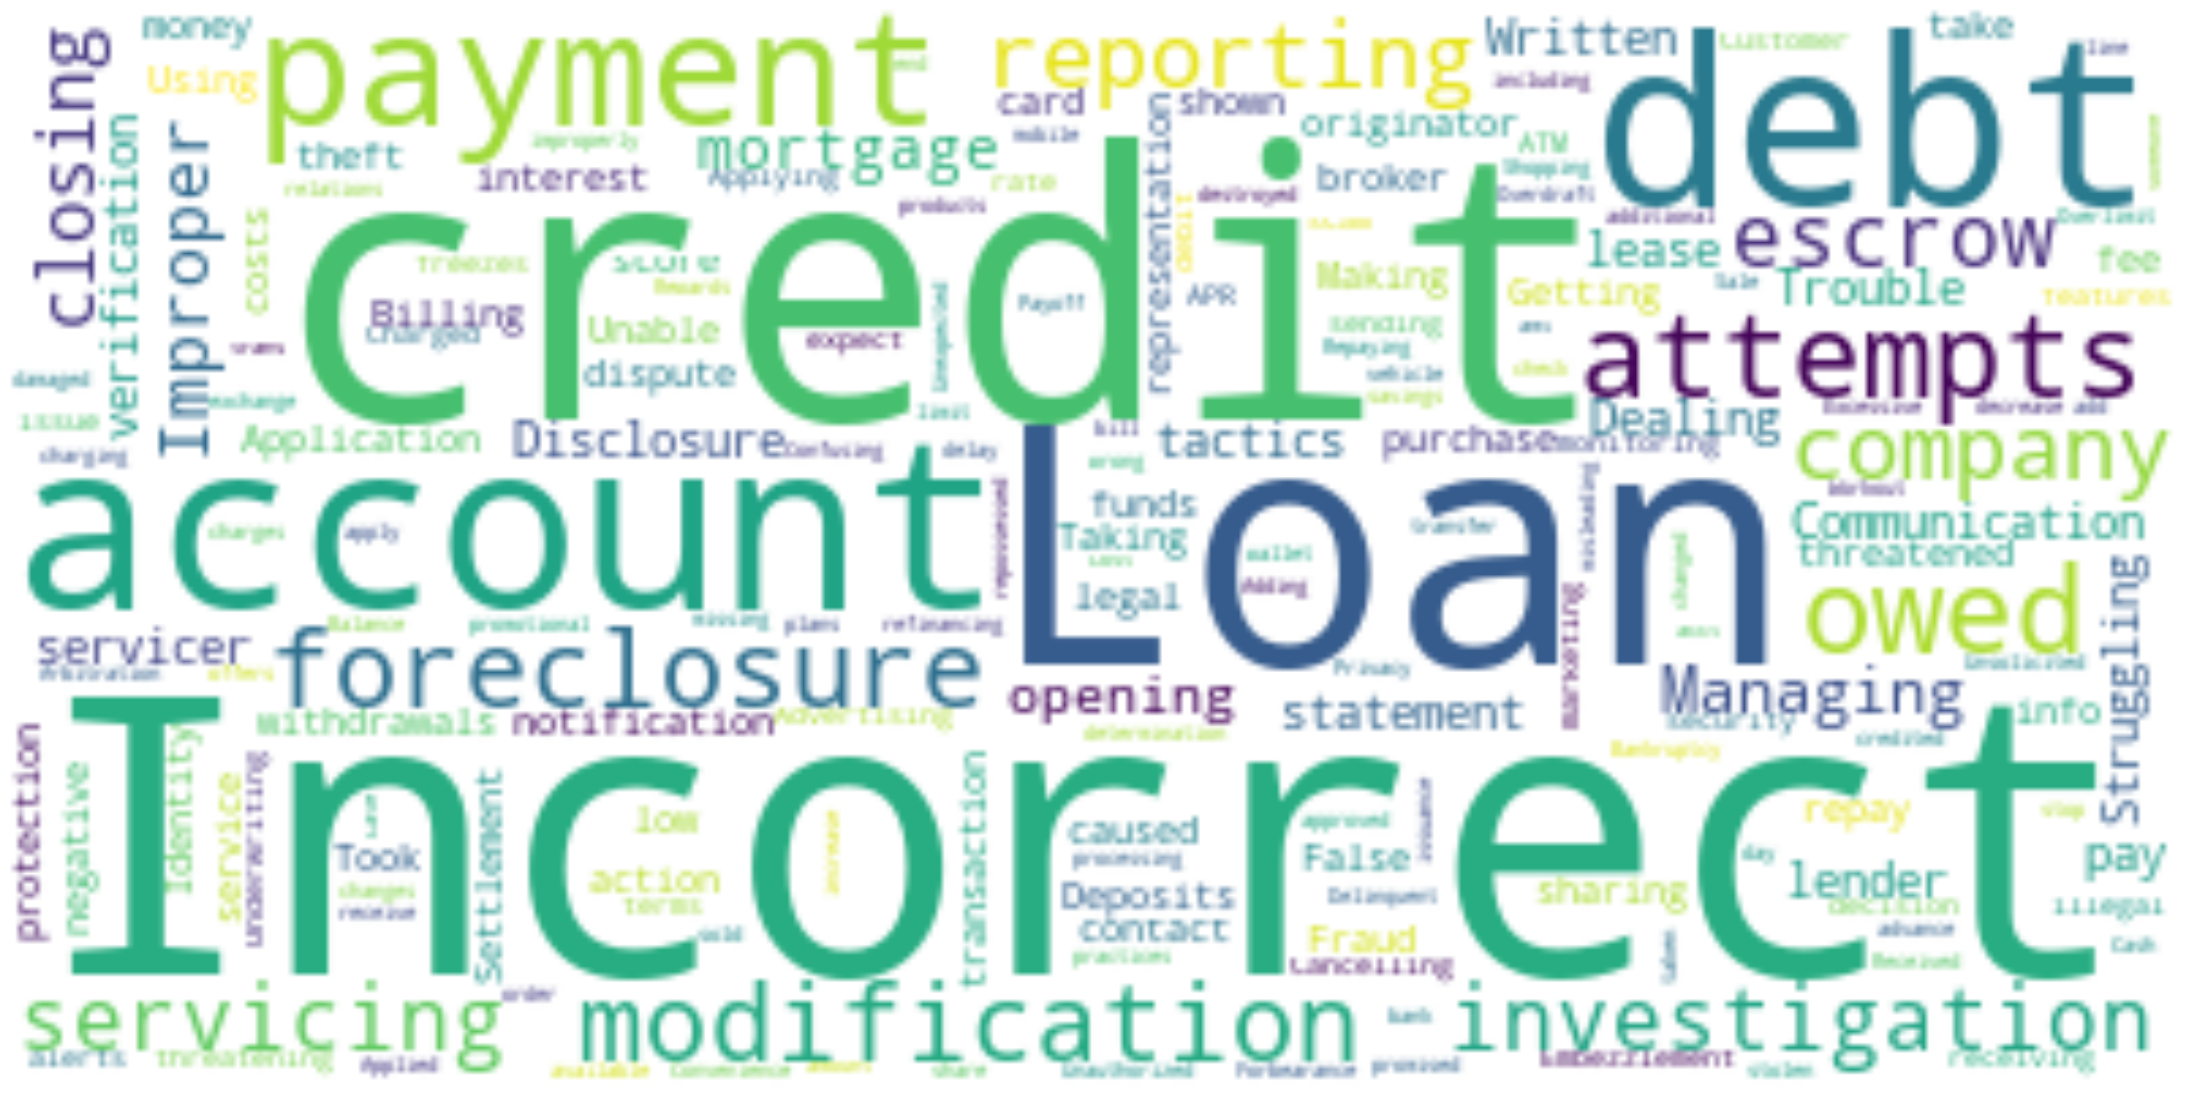

In [8]:
# Display the generated image:
plt.figure(figsize=[40,20])
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

Takeaways: after eliminating words with no solid meanings, the most mentioned word becomee credit, loan and incorrect. Credit and loan are things our customers care about and incorrect are things that our customers may often encounter with.

In [9]:
# Group the dataframe by company
company = data.groupby("Company")

In [10]:
# Sort companys by the size of issues
company.size().sort_values(ascending=False).head()

Company
EQUIFAX, INC.                             13229
Experian Information Solutions Inc.       11749
TRANSUNION INTERMEDIATE HOLDINGS, INC.    11552
BANK OF AMERICA, NATIONAL ASSOCIATION      8545
WELLS FARGO & COMPANY                      7422
dtype: int64

In [11]:
# Join all reviews of companies with most issues: EQUIFAX, INC. and Experian Information Solutions Inc.
EQ_complaint = " ".join(word for word in data[data["Company"] == "EQUIFAX, INC."].Issue)
EIS_complaint = " ".join(word for word in data[data["Company"] == "Experian Information Solutions Inc."].Issue)

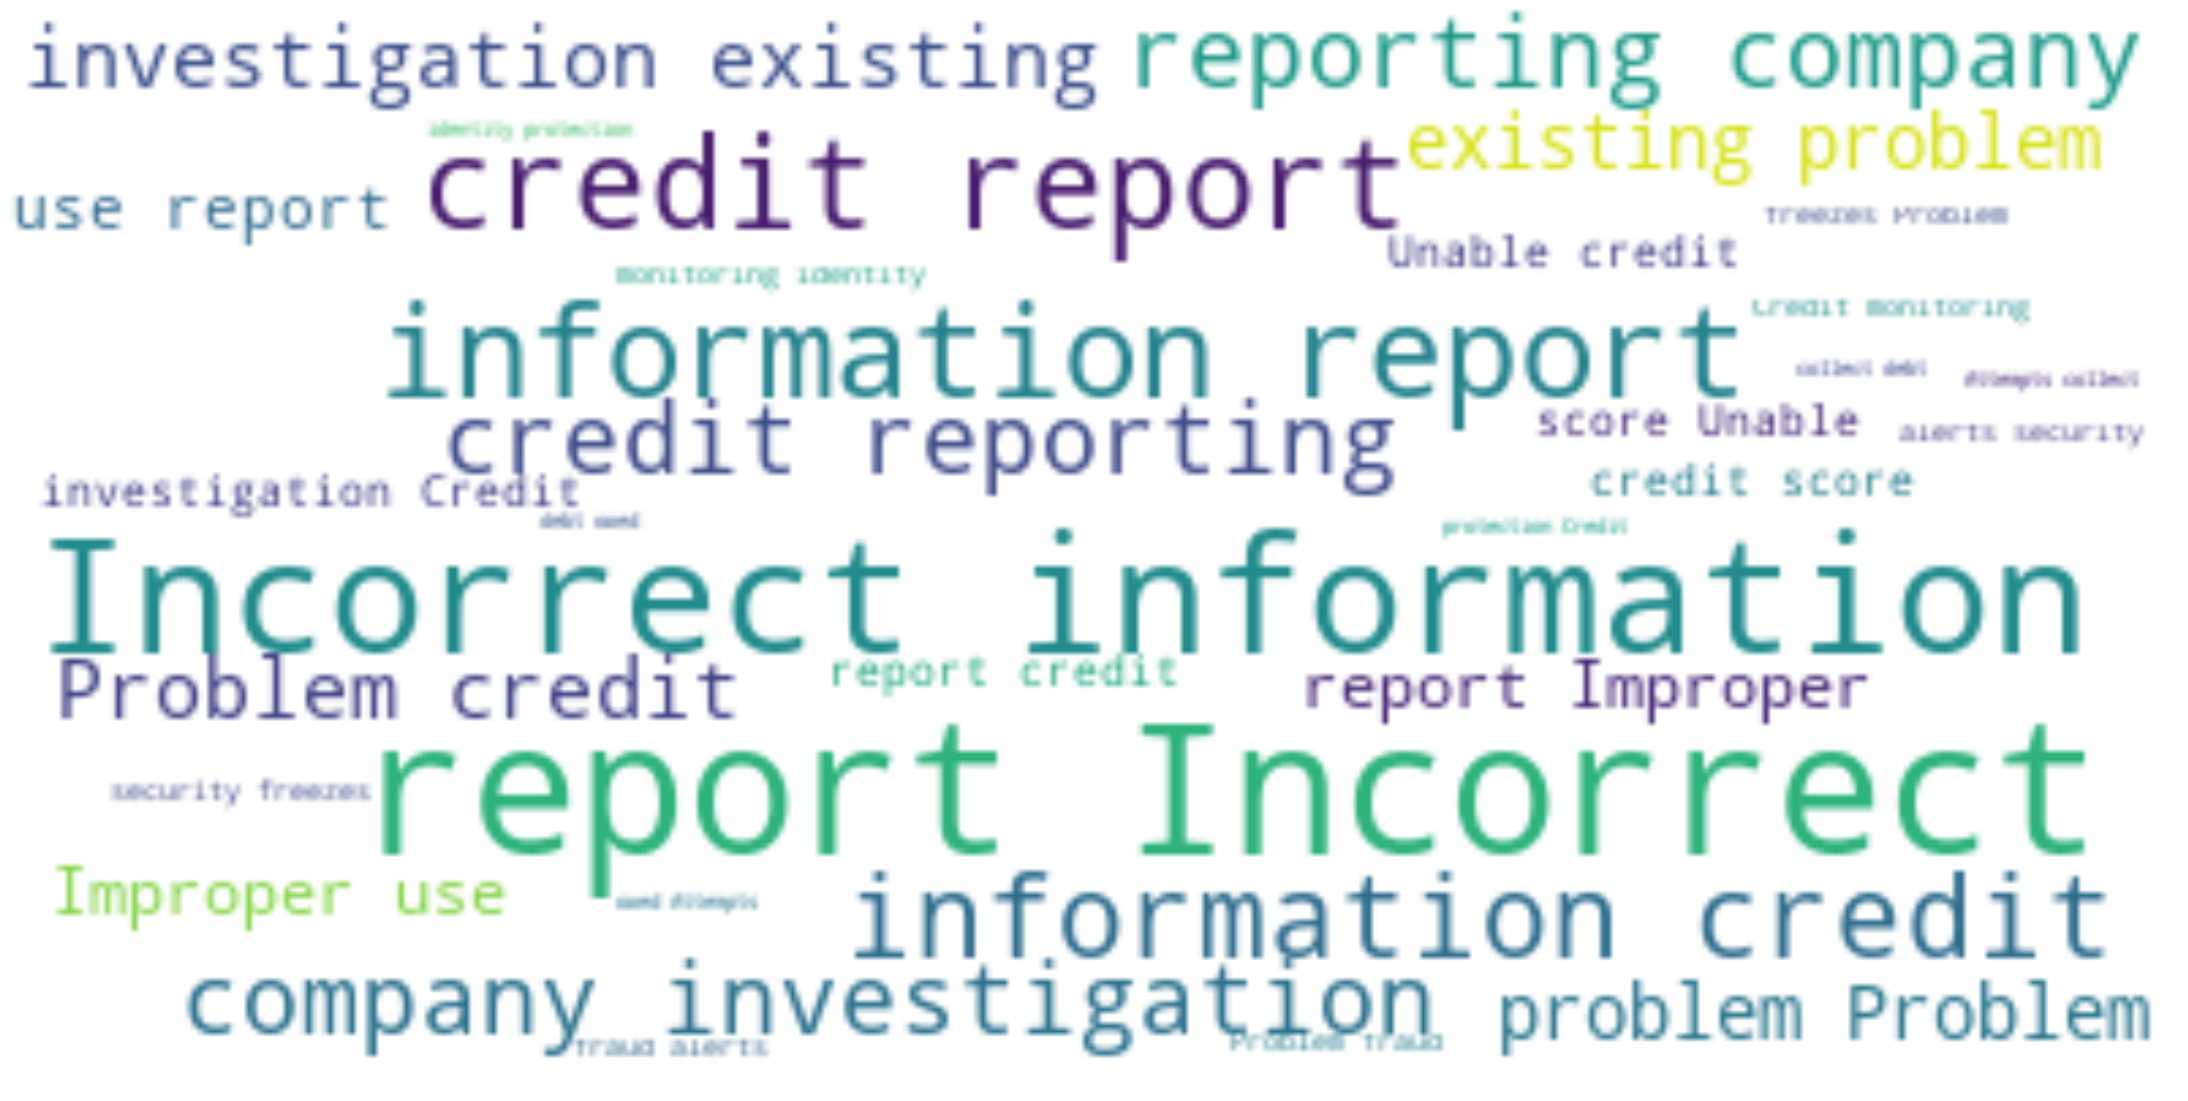

In [12]:
# Generate a word cloud image for the company EQUIFAX, INC., who has the most issues
EQ_wordcloud = WordCloud(background_color="white").generate(EQ_complaint)
plt.figure(figsize=[40,20])
plt.imshow(EQ_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

EQUIFAX, INC. has the greatest number complaints among all those companies. Customers complain about incorrect information and credit reporting related to the service provided by EQUIFAX, INC.

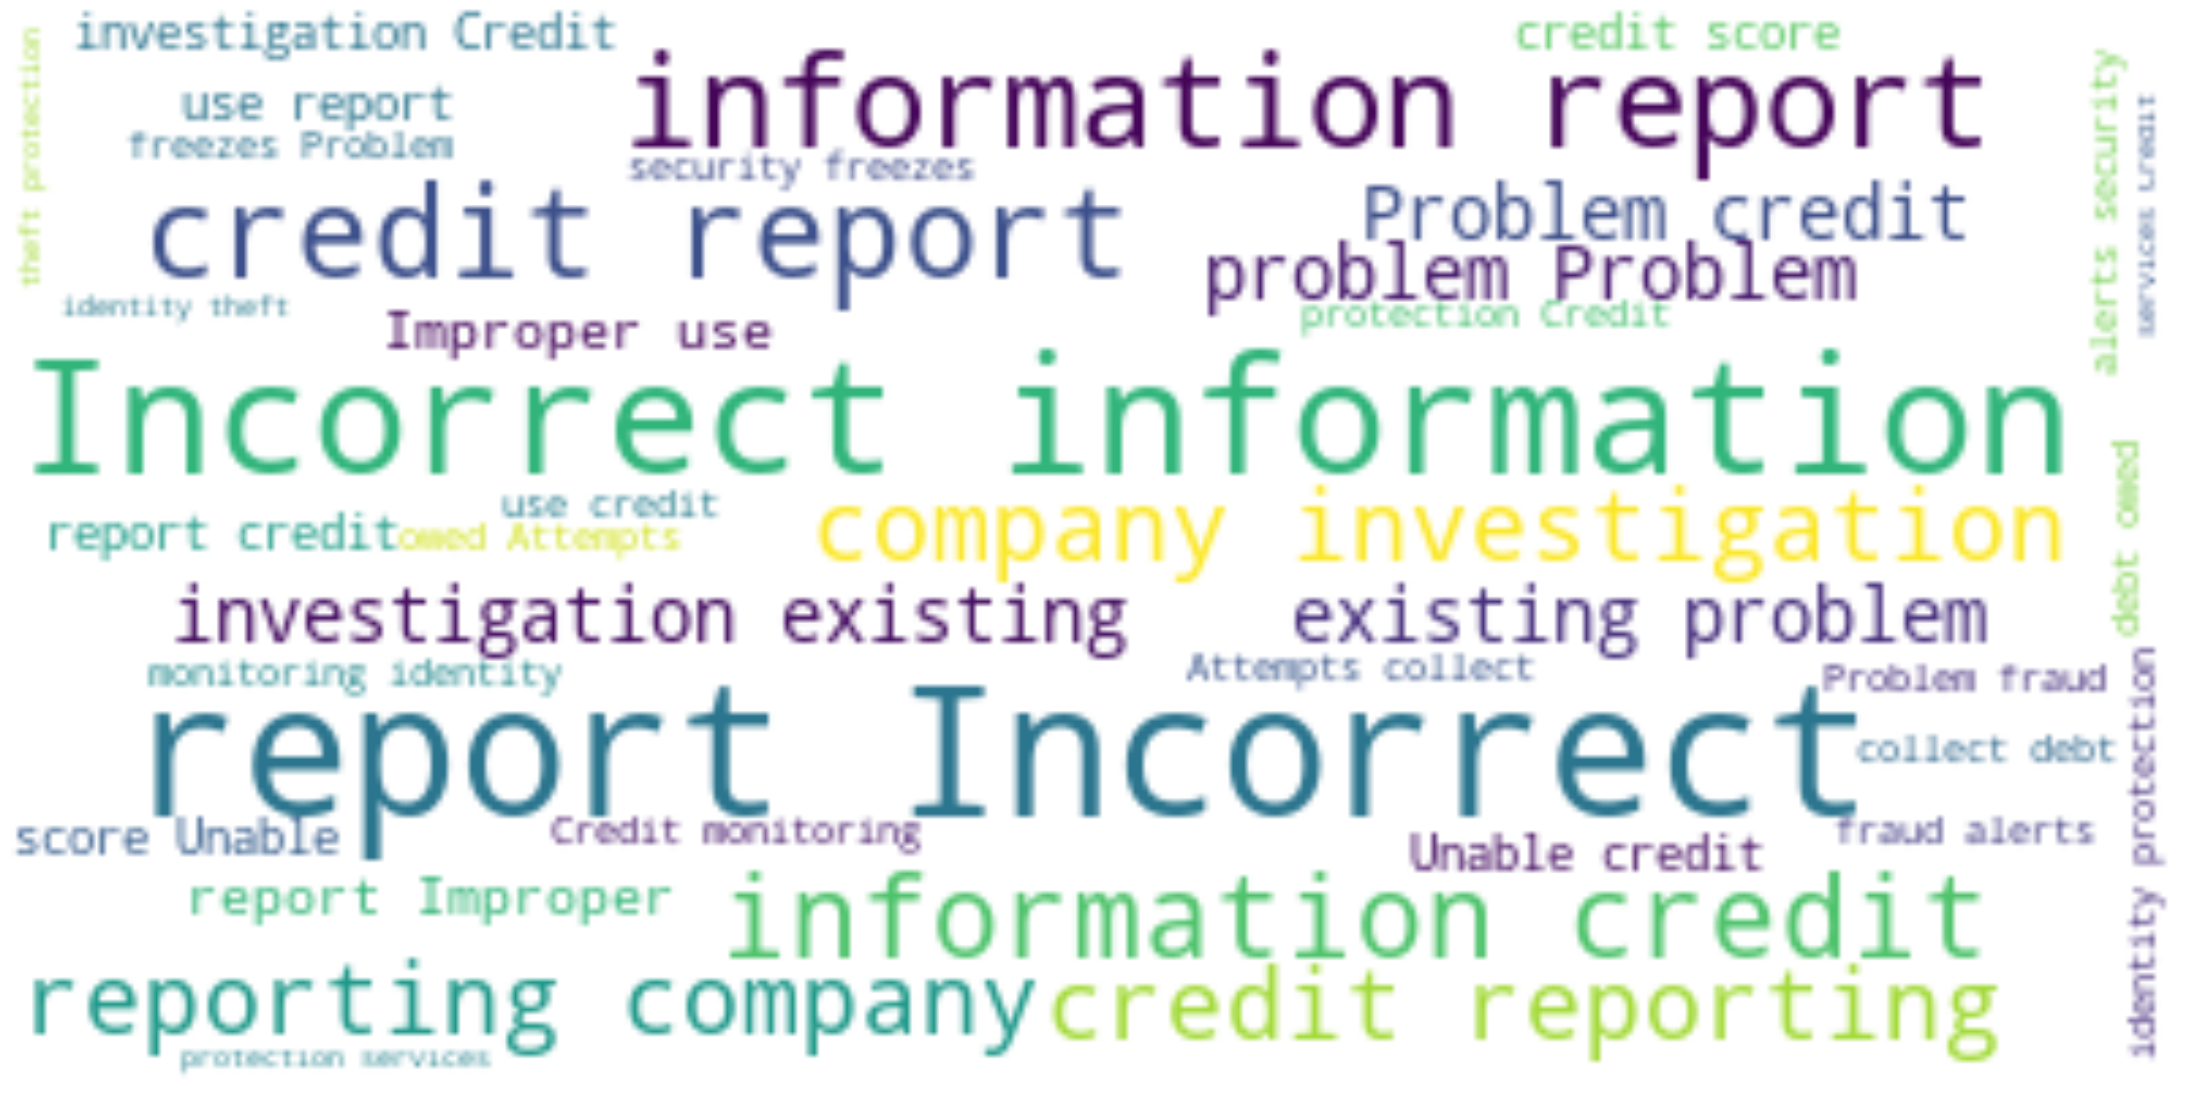

In [13]:
# Generate a word cloud image for Experian Information Solutions Inc., who has second most issues
EIS_wordcloud = WordCloud(background_color="white").generate(EIS_complaint)
plt.figure(figsize=[40,20])
plt.imshow(EIS_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Experian Information Solutions Inc. ranks second regarding to the number of complaints among all those companies. The most serious issues in this company are incorrect information and report incorrect, quite similar with EQUIFAX, INC. and the overall situation.